
# Week 04 – Image Processing Assignment

## Topics Covered
- Power Law Transformation (Gamma Correction)
- Image Negative
- Gamma Curves Analysis
- Intensity Range Mapping
- Practical Image Enhancement Techniques

**Student Name:** ___Mirkomol________________________  
**Student ID:** __230696_________________________  
**Course:** __________third year CS-2_________________  
**Instructor:** _____Behnam Kiani______________________  
**Date:** 21 February 2026

---

## Submission Rules
- All solutions must be implemented in code.
- Output images must be clearly displayed.
- Code must be clean and well-structured.
- No theoretical explanation sections required.

---



# Part 1 – Power Law Transformation (Gamma Correction)

### Challenge 1.1
Implement a function `gamma_correction(image, gamma)` from scratch.

Requirements:
- Normalize image to [0,1]
- Apply power-law transformation
- Convert back to uint8
- Display original and corrected image side by side

---


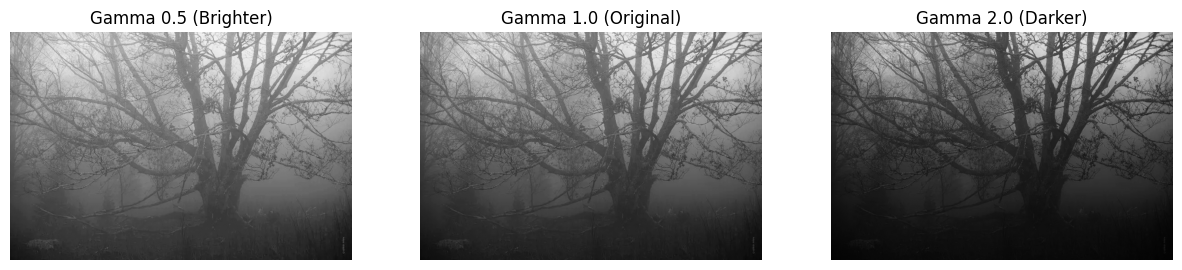

In [1]:
# Implement gamma_correction function here
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma):
    normalized = image / 255.0
    corrected = np.power(normalized, gamma)
    final_image = np.uint8(corrected * 255)
    return final_image

img = cv2.imread('/home/kamolk/Pictures/black-and-white-low-contrast-fog.webp', cv2.IMREAD_GRAYSCALE)
gamma_05 = gamma_correction(img, 0.5)
gamma_10 = gamma_correction(img, 1.0)
gamma_20 = gamma_correction(img, 2.0)
titles = ['Gamma 0.5 (Brighter)', 'Gamma 1.0 (Original)', 'Gamma 2.0 (Darker)']
images = [gamma_05, gamma_10, gamma_20]
plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


### Challenge 1.2 – Gamma Curve Analysis

1. Generate intensity values r in range [0,1].
2. Plot gamma curves for at least 5 different gamma values.
3. Ensure all curves appear in one plot.

---


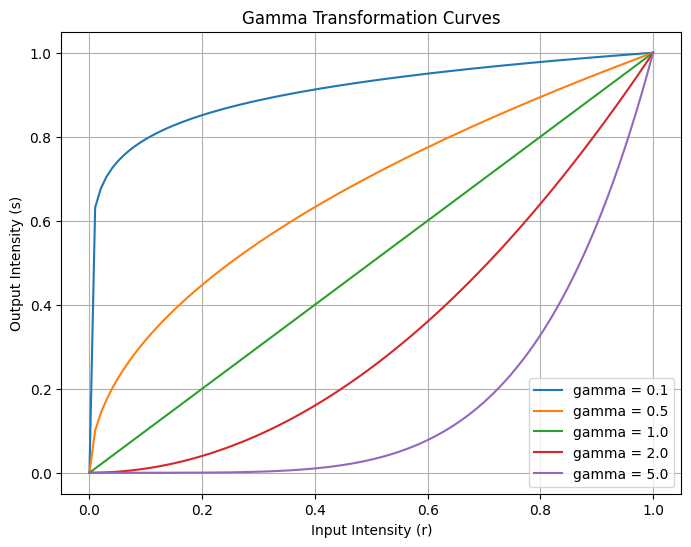

In [2]:
# Plot gamma curves here
r = np.linspace(0, 1, 100)
gammas = [0.1, 0.5, 1.0, 2.0, 5.0]
plt.figure(figsize=(8, 6))

for g in gammas:
    s = np.power(r, g)
    plt.plot(r, s, label=f'gamma = {g}')

plt.title("Gamma Transformation Curves")
plt.xlabel("Input Intensity (r)")
plt.ylabel("Output Intensity (s)")
plt.legend()
plt.grid(True)
plt.show()


### Challenge 1.3 – Comparative Study

Apply gamma values:
- 0.5
- 1.0
- 2.0

Display results in a structured layout.
Add titles clearly indicating gamma value.

---


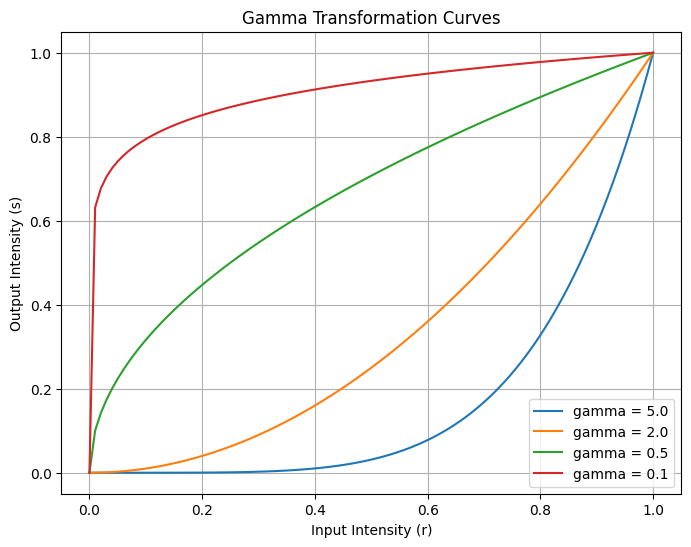

In [20]:
# Comparative gamma correction implementation
r = np.linspace(0, 1, 100)
gammas = [5.0, 2.0, 0.5, 0.1]
plt.figure(figsize=(8, 6))
for g in gammas:
    s = np.power(r, g)
    plt.plot(r, s, label=f'gamma = {g}')
plt.title("Gamma Transformation Curves")
plt.xlabel("Input Intensity (r)")
plt.ylabel("Output Intensity (s)")
plt.legend()
plt.grid(True)
plt.show()


# Part 2 – Basic Intensity Transformations

### Challenge 2.1 – Image Negative

Create an image negative function without using built-in shortcuts.

Formula must be implemented manually.

---


In [19]:
# Implement image negative transformation
def get_negative(image):
    negative_img = 255 - image
    return negative_img.astype(np.uint8)


### Challenge 2.2 – Intensity Range Mapping

Set pixel intensity range [A, B] to white (255).

Requirements:
- Accept A and B as parameters.
- Leave other pixels unchanged.
- Display before and after.

---


In [18]:
# Implement intensity range mapping
def intensity_mapping(image, A, B):
    output = image.copy()
    mask = (output >= A) & (output <= B)
    output[mask] = 255
    return output


### Challenge 2.3 – Integrated Enhancement

Create a pipeline that:
1. Reads image
2. Applies gamma correction
3. Applies intensity mapping
4. Displays final enhanced image

---


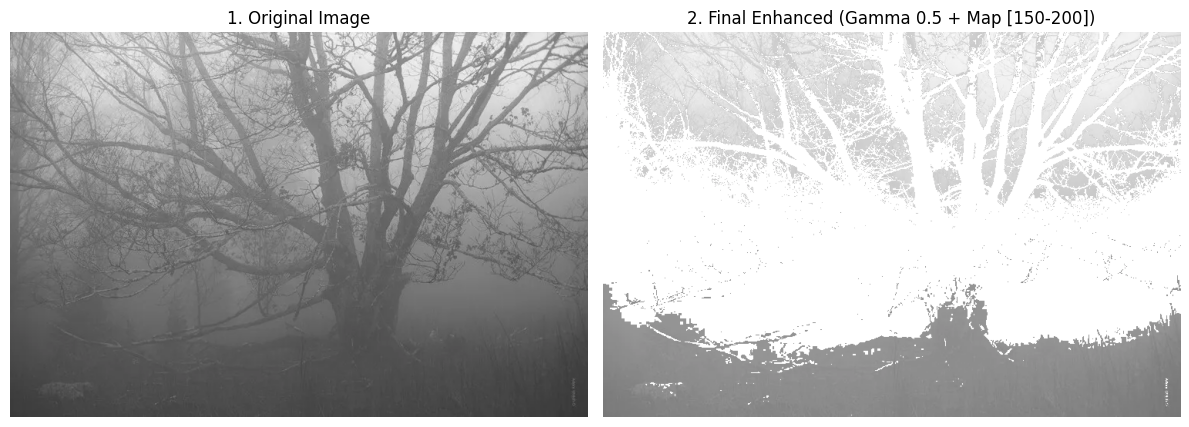

In [16]:
# Build full enhancement pipeline
import cv2
import numpy as np
import matplotlib.pyplot as plt

def integrated_pipeline(image_path, gamma, A, B):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Image not found.")
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gamma_step = np.uint8(np.power(img_rgb / 255.0, gamma) * 255)
    final_enhanced = gamma_step.copy()
    mask = (final_enhanced >= A) & (final_enhanced <= B)
    final_enhanced[mask] = 255
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("1. Original Image")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(final_enhanced)
    plt.title(f"2. Final Enhanced (Gamma {gamma} + Map [{A}-{B}])")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

path = '/home/kamolk/Pictures/black-and-white-low-contrast-fog.webp'
integrated_pipeline(path, gamma=0.5, A=150, B=200)



# Part 3 – Advanced Optimization Challenge

### Challenge 3.1 – Performance & Robustness

Improve your functions by:

- Adding input validation
- Handling grayscale and RGB images
- Avoiding redundant computations
- Structuring reusable functions

---

### Final Task

Create one clean final script that performs:
- Gamma analysis
- Negative transformation
- Intensity mapping
- Final comparison visualization

---


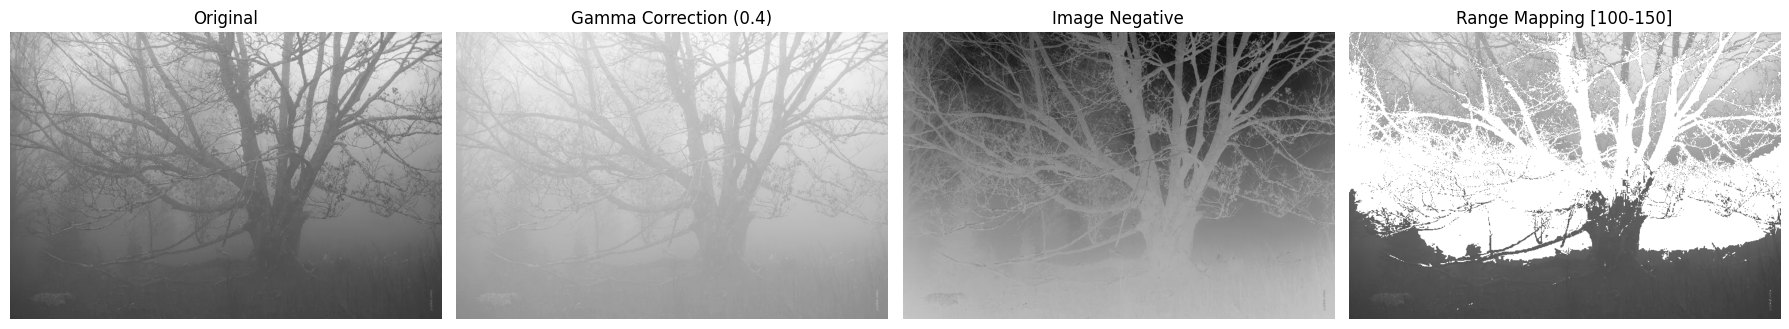

In [17]:
# Final optimized solution
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image_final(image_path, g_val, low_range, high_range):
    img = cv2.imread(image_path)
    
    if img is None:
        print(f"Error: Could not find image at {image_path}")
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gamma_img = np.uint8(np.power(img_rgb / 255.0, g_val) * 255)
    negative_img = 255 - img_rgb
    mapped_img = img_rgb.copy()
    mask = (mapped_img >= low_range) & (mapped_img <= high_range)
    mapped_img[mask] = 255
    plt.figure(figsize=(18, 5))
    results = [img_rgb, gamma_img, negative_img, mapped_img]
    titles = ['Original', f'Gamma Correction ({g_val})', 'Image Negative', f'Range Mapping [{low_range}-{high_range}]']
    
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(results[i])
        plt.title(titles[i])
        plt.axis('off')    
    plt.tight_layout()
    plt.show()

my_path = '/home/kamolk/Pictures/black-and-white-low-contrast-fog.webp'
process_image_final(my_path, g_val=0.4, low_range=100, high_range=150)